In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [8]:
# Generate dummy random data X of size (300,6) and y of size (300,)
X = np.load("Data/X_train.npy")
y = np.load("Data/Y_train.npy")

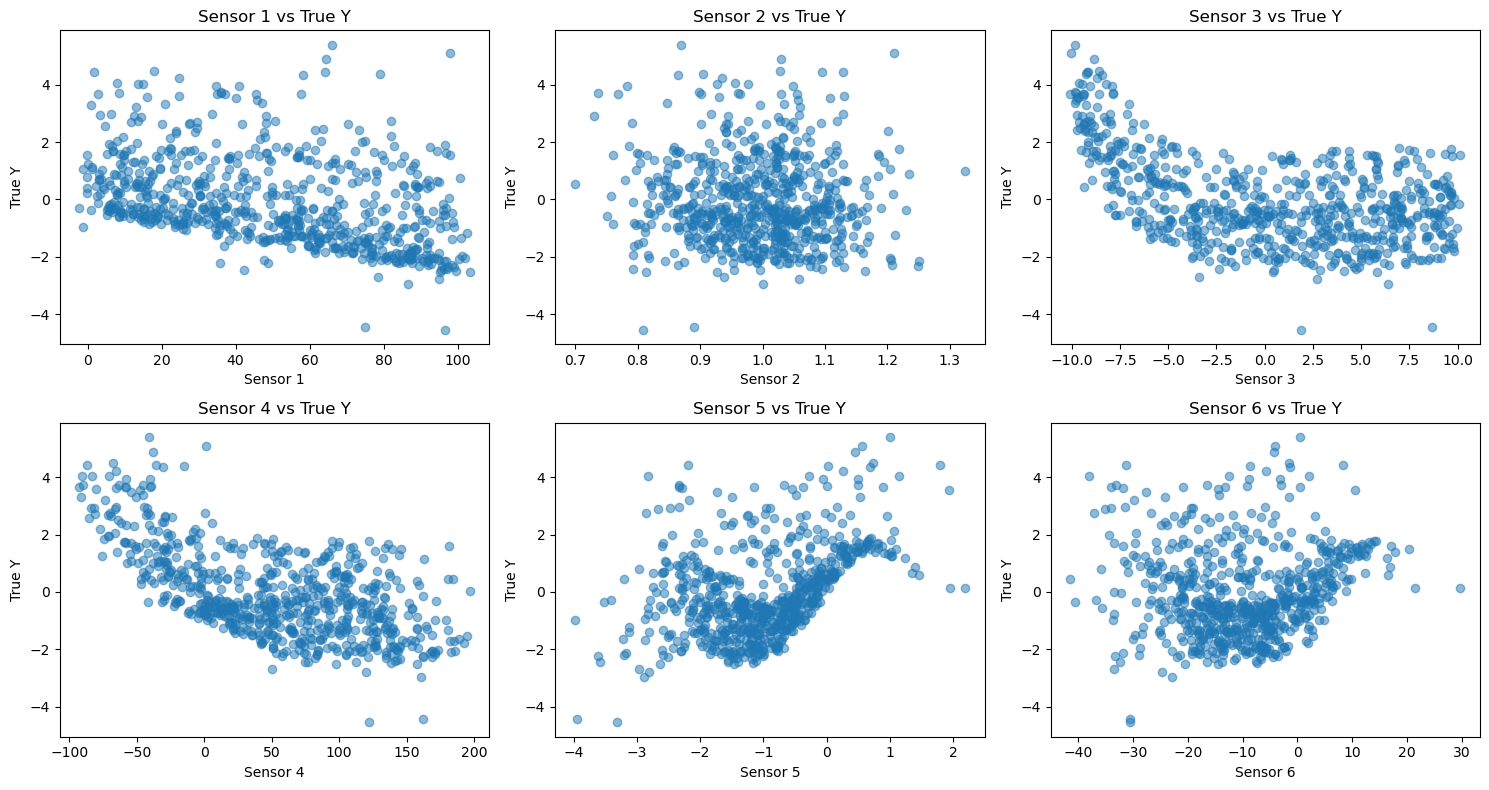

In [ ]:
n_features = X.shape[1]

plt.figure(figsize=(15, 8))

for i in range(n_features):
    plt.subplot(2, 3, i+1) 
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.xlabel(f"Sensor {i+1}")
    plt.ylabel("True Y")
    plt.title(f"Sensor {i+1} vs True Y")

plt.tight_layout()
plt.show()

In [61]:
# Separate the data into training and test for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(560, 6)
(140, 6)


In [62]:
# Test polynomial degrees from 1 to 6
for degree in range(1, 7):
    # Generate polynomial features
    polynomial_model = PolynomialFeatures(degree=degree, include_bias=False)
    X_polynomial = polynomial_model.fit_transform(X_train)
    
    # Fit regression model
    model = LinearRegression()
    model.fit(X_polynomial, y_train)
    
    # Predict on training data
    Y_pred = model.predict(X_polynomial)
    
    # Compute R^2
    r2 = r2_score(y_train, Y_pred)
    
    print(f"Degree {degree}: R^2 = {r2:.4f}\n")

Degree 1: R^2 = 0.5805

Degree 2: R^2 = 0.8363

Degree 3: R^2 = 0.8887

Degree 4: R^2 = 0.9860

Degree 5: R^2 = 0.9962

Degree 6: R^2 = 0.9993



In [69]:
# Separate the data into training and test for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on train data
X_test = scaler.transform(X_test) 

print(X_train)

(560, 6)
(140, 6)
[[-0.05571996 -0.587413   -0.0095075   0.02655826 -2.15002131 -1.90158184]
 [ 0.19088484 -1.11215565 -0.09752385 -0.06592335 -1.12311453 -0.9890371 ]
 [-1.64912369  0.65824754  1.36203274  0.54215325 -1.20717706 -0.33161459]
 ...
 [-0.62438057  1.52905522  1.15807064  0.73345818  0.48953592  1.01436972]
 [-0.2469469  -1.36986553  0.42707432  0.26137708 -0.90365872 -0.53081373]
 [-1.1719307   1.49679103  0.01567468 -0.49234238  0.35615399  0.31174687]]


In [64]:
# Test polynomial degrees from 1 to 6
for degree in range(1, 7):
    # Generate polynomial features
    polynomial_model = PolynomialFeatures(degree=degree, include_bias=False)
    X_polynomial = polynomial_model.fit_transform(X_train)
    
    # Fit regression model
    model = LinearRegression()
    model.fit(X_polynomial, y_train)
    
    # Predict on training data
    Y_pred = model.predict(X_polynomial)
    
    # Compute R^2
    r2 = r2_score(y_train, Y_pred)
    
    print(f"Degree {degree}: R^2 = {r2:.4f}\n")

Degree 1: R^2 = 0.5805

Degree 2: R^2 = 0.8363

Degree 3: R^2 = 0.8887

Degree 4: R^2 = 0.9861

Degree 5: R^2 = 0.9984

Degree 6: R^2 = 1.0000



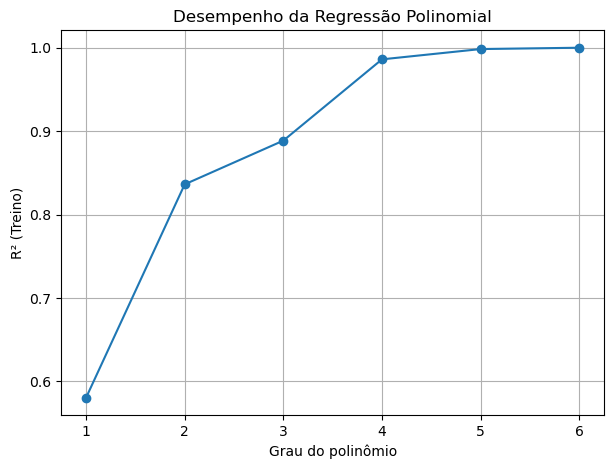

In [73]:

degrees = range(1, 7)
r2_scores = []

for degree in degrees:
    # Criar atributos polinomiais
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_train)
    
    # Regressão linear
    model = LinearRegression()
    model.fit(X_poly, y_train)
    
    # Previsão e R²
    y_pred = model.predict(X_poly)
    r2_scores.append(r2_score(y_train, y_pred))

# Plot
plt.figure(figsize=(7, 5))
plt.plot(degrees, r2_scores, marker='o')
plt.xlabel("Grau do polinômio")
plt.ylabel("R² (Treino)")
plt.title("Desempenho da Regressão Polinomial")
plt.xticks(degrees)
plt.grid(True)
plt.show()

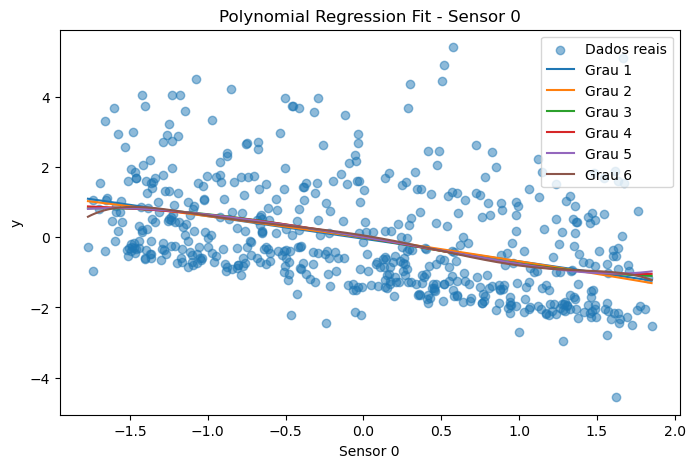

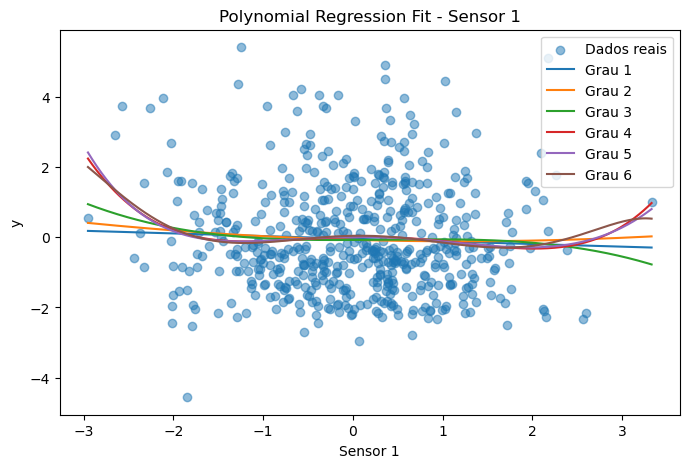

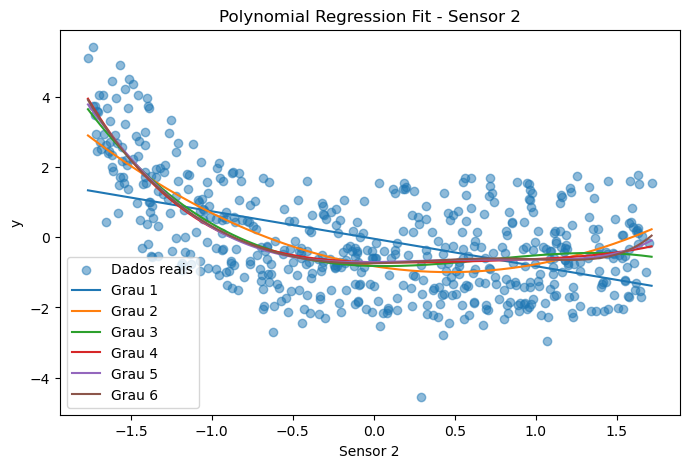

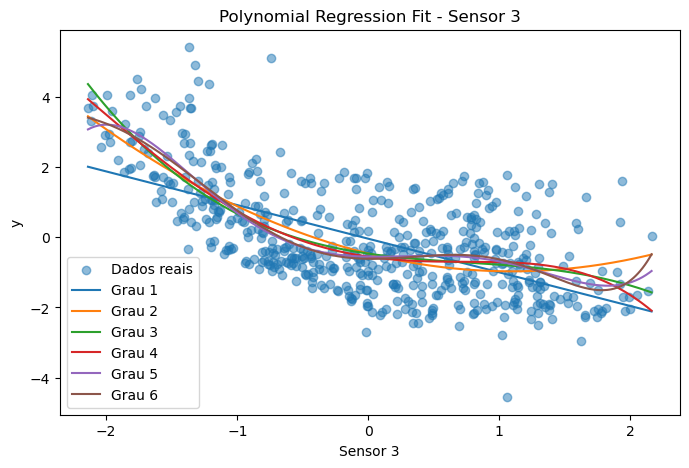

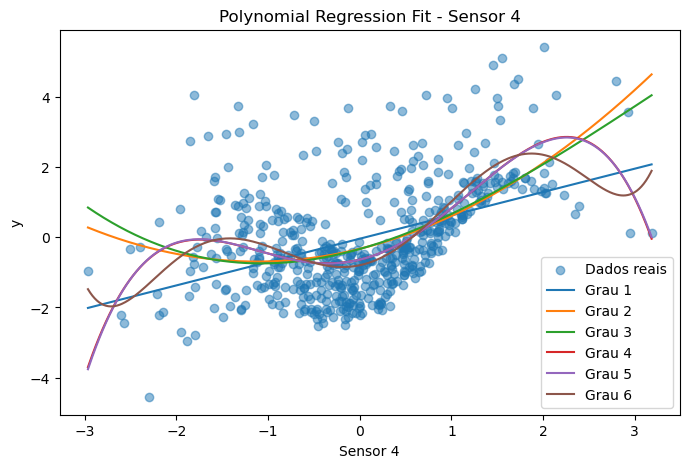

In [67]:
for feature in range(5):
    X_sensor = X_train[:, feature].reshape(-1, 1)
    
    # Preparar figura
    plt.figure(figsize=(8,5))
    plt.scatter(X_sensor, y_train, alpha=0.5, label='Dados reais')
    
    # Criar curvas polinomiais para graus 1 a 6
    x_plot = np.linspace(X_sensor.min(), X_sensor.max(), 500).reshape(-1, 1)
    
    for degree in range(1, 7):
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly_train = poly.fit_transform(X_sensor)
        X_poly_plot = poly.transform(x_plot)
        
        model = LinearRegression()
        model.fit(X_poly_train, y_train)
        y_plot = model.predict(X_poly_plot)
        
        plt.plot(x_plot, y_plot, label=f"Grau {degree}")
    
    plt.xlabel(f"Sensor {feature}")
    plt.ylabel("y")
    plt.title(f"Polynomial Regression Fit - Sensor {feature}")
    plt.legend()
    plt.show()

In [72]:
# Loop over polynomial degrees
for degree in range(1, 11):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    Y_pred_train = model.predict(X_train_poly)
    Y_pred_test = model.predict(X_test_poly)

    # R² scores
    r2_train = r2_score(y_train, Y_pred_train)
    r2_test = r2_score(y_test, Y_pred_test)

    print(f"Degree {degree}: R² train = {r2_train:.4f}, R² test = {r2_test:.4f}")

Degree 1: R² train = 0.5805, R² test = 0.4662
Degree 2: R² train = 0.8363, R² test = 0.7913
Degree 3: R² train = 0.8887, R² test = 0.8277
Degree 4: R² train = 0.9861, R² test = 0.8658
Degree 5: R² train = 0.9984, R² test = 0.0949
Degree 6: R² train = 1.0000, R² test = -1.1083
Degree 7: R² train = 1.0000, R² test = -0.4857
Degree 8: R² train = 1.0000, R² test = -14.6758
Degree 9: R² train = 1.0000, R² test = -80.7476
Degree 10: R² train = 1.0000, R² test = -253.5561
